## Model for Stock Portfolio or Sector Strategies

The project consists on the first iteration of a model designed to forecast the closing price of a specific collection of stocks, with the ultimate goal of constructing portfolios or to check strategies across different sectors, such as big tech or finance companies. The model's initial version employs historical stock prices as the primary input variable, aiming to establish a baseline performance for future iterations that incorporate additional data sources like news and financial reports.

In [87]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import warnings
import alpaca_trade_api as tradeapi
warnings.filterwarnings('ignore')
import pandas_datareader as pdr

## User Input

Before proceeding, please customize the following parameters to specify the stocks and time period for which you want to analyze stock prices and predict closing prices:

**List of Stock Symbols:**
Enter a list of stock symbols separated by commas. For instance, to analyze the performance of Apple, Meta (formerly Facebook), Google, Amazon, and Tesla, use the following:

```python
symbols = ["AAPL", "META", "GOOG", "AMZN", "TSLA"]


**Number of Days to Retrieve Data For:**
Specify the number of historical trading days for which you want to retrieve data. For example, to analyze the past 20 trading days, use:

python
num_days = 20


**Set the Start and End Dates:**
Choose the starting and ending dates for the data retrieval. For instance, to analyze the period from October 4, 2023, to October 24, 2023, use:

python
start_date = "2023-10-04"
end_date = "2023-10-24"


Once you've customized these parameters, the model will analyze the selected stocks and generate insights based on the specified timeframe.


[*********************100%%**********************]  5 of 5 completed
        Adj Close                                                       Close  \
             AAPL        AMZN        GOOG        META        TSLA        AAPL   
count   14.000000   14.000000   14.000000   14.000000   14.000000   14.000000   
mean   176.613752  128.920713  138.902857  316.447141  248.117142  176.846431   
std      2.569026    2.404770    1.719813    7.011408   18.979849    2.572412   
min    172.652542  125.169998  135.990005  304.790009  211.990005  172.880005   
25%    174.817192  127.240000  138.069996  313.110001  244.789993  175.047504   
50%    177.086700  128.329994  139.089996  316.199997  256.860001  177.320000   
75%    178.582230  131.049999  140.092495  321.667496  260.409996  178.817505   
max    180.472244  132.550003  141.699997  327.820007  263.619995  180.710007   

                                                       ...        Open  \
             AMZN        GOOG        META     

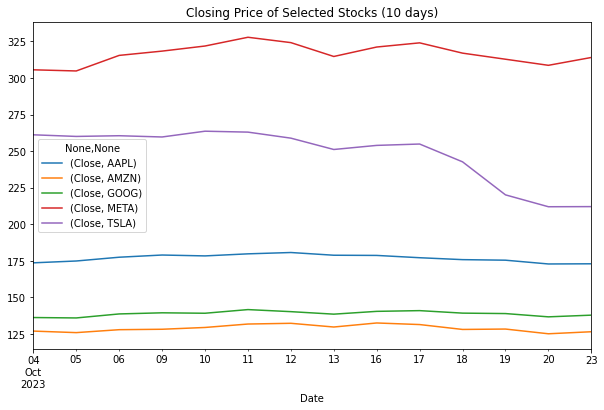

In [88]:
import yfinance as yf

# List of stock symbols
symbols = ["AAPL", "META", "GOOG", "AMZN", "TSLA"]

# Number of days to retrieve data for
num_days = 20

# Set the start and end dates
start_date = "2023-10-04"
end_date = "2023-10-24"

# Download the data for the specified symbols
data = yf.download(symbols, start=start_date, end=end_date)

# Print a summary of the data
print(data.describe())

# Plot the Closing Price of each stock
data[["Close"]].plot(figsize=(10, 6))
plt.title("Closing Price of Selected Stocks (10 days)")
plt.show()

In [89]:
data.head()

Adj Close                                                  \
                  AAPL        AMZN        GOOG        META        TSLA   
Date                                                                     
2023-10-04  173.431519  127.000000  136.270004  305.579987  261.160004   
2023-10-05  174.679871  125.959999  135.990005  304.790009  260.049988   
2023-10-06  177.256485  127.959999  138.729996  315.429993  260.529999   
2023-10-09  178.754501  128.259995  139.500000  318.359985  259.670013   
2023-10-10  178.155289  129.479996  139.199997  321.839996  263.619995   

                 Close                                                  ...  \
                  AAPL        AMZN        GOOG        META        TSLA  ...   
Date                                                                    ...   
2023-10-04  173.660004  127.000000  136.270004  305.579987  261.160004  ...   
2023-10-05  174.910004  125.959999  135.990005  304.790009  260.049988  ...   
2023-10-06  177.490005  127.959999  138.729996  315.429993  260.529999  ...   
2023-10-09  178.990005  128.259995  139.500000  318.359985  259.670013  ...   
2023-10-10  178.389999  129.479996  139.199997  321.839996  263.619995  ...   

                  Open                                                  \
                  AAPL        AMZN        GOOG        META        TSLA   
Date                                                                     
2023-10-04  171.089996  126.059998  133.660004  298.730011  248.139999   
2023-10-05  173.789993  126.709999  136.130005  304.630005  260.000000   
2023-10-06  173.800003  124.160004  134.940002  301.440002  253.979996   
2023-10-09  176.809998  126.220001  137.990005  312.500000  255.309998   
2023-10-10  178.100006  128.820007  139.509995  319.119995  257.750000   

              Volume                                           
                AAPL      AMZN      GOOG      META       TSLA  
Date                                                           
2023-10-04  53020300  44203900  22848000  16880500  129721600  
2023-10-05  48527900  39660600  15922900  19130000  119159200  
2023-10-06  57224100  46795900  20819300  21784000  117947000  
2023-10-09  42390800  38773700  16599100  22503700  101377900  
2023-10-10  43698000  42178600  19554900  19038000  122656000  

[5 rows x 30 columns]

In [90]:
data.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'AMZN'),
            ('Adj Close', 'GOOG'),
            ('Adj Close', 'META'),
            ('Adj Close', 'TSLA'),
            (    'Close', 'AAPL'),
            (    'Close', 'AMZN'),
            (    'Close', 'GOOG'),
            (    'Close', 'META'),
            (    'Close', 'TSLA'),
            (     'High', 'AAPL'),
            (     'High', 'AMZN'),
            (     'High', 'GOOG'),
            (     'High', 'META'),
            (     'High', 'TSLA'),
            (      'Low', 'AAPL'),
            (      'Low', 'AMZN'),
            (      'Low', 'GOOG'),
            (      'Low', 'META'),
            (      'Low', 'TSLA'),
            (     'Open', 'AAPL'),
            (     'Open', 'AMZN'),
            (     'Open', 'GOOG'),
            (     'Open', 'META'),
            (     'Open', 'TSLA'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'AMZN'),
            (   'Volume', 'GOOG'),
            (   'Vol

In [91]:
data.info

<bound method DataFrame.info of              Adj Close                                                  \
                  AAPL        AMZN        GOOG        META        TSLA   
Date                                                                     
2023-10-04  173.431519  127.000000  136.270004  305.579987  261.160004   
2023-10-05  174.679871  125.959999  135.990005  304.790009  260.049988   
2023-10-06  177.256485  127.959999  138.729996  315.429993  260.529999   
2023-10-09  178.754501  128.259995  139.500000  318.359985  259.670013   
2023-10-10  178.155289  129.479996  139.199997  321.839996  263.619995   
2023-10-11  179.563431  131.830002  141.699997  327.820007  262.989990   
2023-10-12  180.472244  132.330002  140.289993  324.160004  258.869995   
2023-10-13  178.614685  129.789993  138.580002  314.690002  251.119995   
2023-10-16  178.484863  132.550003  140.490005  321.149994  253.919998   
2023-10-17  176.916916  131.470001  140.990005  324.000000  254.850006   
2023-1

In [92]:
# Drop the 'Volume' and 'Adj Close' columns from the DataFrame
data.drop(['Volume', 'Adj Close'], axis=1, inplace=True)

In [93]:
data.corr()

Close                                              High  \
                AAPL      AMZN      GOOG      META      TSLA      AAPL   
Close AAPL  1.000000  0.836089  0.768320  0.787991  0.665865  0.930945   
      AMZN  0.836089  1.000000  0.882125  0.861221  0.486988  0.782889   
      GOOG  0.768320  0.882125  1.000000  0.963384  0.304325  0.701008   
      META  0.787991  0.861221  0.963384  1.000000  0.350133  0.714874   
      TSLA  0.665865  0.486988  0.304325  0.350133  1.000000  0.467136   
High  AAPL  0.930945  0.782889  0.701008  0.714874  0.467136  1.000000   
      AMZN  0.712669  0.875863  0.773805  0.725158  0.167303  0.835220   
      GOOG  0.678946  0.747211  0.864816  0.841118  0.046813  0.781502   
      META  0.716492  0.758168  0.864511  0.876949  0.096468  0.805494   
      TSLA  0.706889  0.514645  0.341158  0.383039  0.984122  0.547170   
Low   AAPL  0.893979  0.771219  0.692525  0.713190  0.455664  0.958498   
      AMZN  0.696585  0.901538  0.720205  0.705524  0.316317  0.762292   
      GOOG  0.678365  0.798661  0.846509  0.813592  0.102161  0.758733   
      META  0.703619  0.802871  0.867811  0.898595  0.163614  0.742303   
      TSLA  0.736213  0.537277  0.359486  0.401487  0.978377  0.576731   
Open  AAPL  0.805212  0.671241  0.594213  0.610100  0.317467  0.943147   
      AMZN  0.522529  0.667613  0.508607  0.457534  0.086404  0.722540   
      GOOG  0.580331  0.648648  0.665921  0.655021 -0.020766  0.751821   
      META  0.593254  0.669488  0.689103  0.689376 -0.038909  0.756833   
      TSLA  0.763618  0.550440  0.391009  0.419675  0.939398  0.636155   

                                                         Low            \
                AMZN      GOOG      META      TSLA      AAPL      AMZN   
Close AAPL  0.712669  0.678946  0.716492  0.706889  0.893979  0.696585   
      AMZN  0.875863  0.747211  0.758168  0.514645  0.771219  0.901538   
      GOOG  0.773805  0.864816  0.864511  0.341158  0.692525  0.720205   
      META  0.725158  0.841118  0.876949  0.383039  0.713190  0.705524   
      TSLA  0.167303  0.046813  0.096468  0.984122  0.455664  0.316317   
High  AAPL  0.835220  0.781502  0.805494  0.547170  0.958498  0.762292   
      AMZN  1.000000  0.872431  0.856285  0.252308  0.827245  0.935823   
      GOOG  0.872431  1.000000  0.987423  0.152217  0.788444  0.768998   
      META  0.856285  0.987423  1.000000  0.196387  0.807031  0.764418   
      TSLA  0.252308  0.152217  0.196387  1.000000  0.551382  0.392892   
Low   AAPL  0.827245  0.788444  0.807031  0.551382  1.000000  0.815238   
      AMZN  0.935823  0.768998  0.764418  0.392892  0.815238  1.000000   
      GOOG  0.895596  0.939445  0.916435  0.202777  0.838214  0.862926   
      META  0.831312  0.920535  0.943289  0.249501  0.812229  0.826734   
      TSLA  0.273950  0.168052  0.208721  0.991769  0.584879  0.417964   
Open  AAPL  0.812494  0.758290  0.771243  0.414636  0.950688  0.752297   
      AMZN  0.895894  0.727415  0.694100  0.200595  0.778661  0.883841   
      GOOG  0.863696  0.892337  0.874512  0.099868  0.814431  0.801191   
      META  0.874524  0.912107  0.907345  0.082698  0.820606  0.819228   
      TSLA  0.338443  0.255837  0.288449  0.977205  0.638996  0.459187   

                                              Open                      \
                GOOG      META      TSLA      AAPL      AMZN      GOOG   
Close AAPL  0.678365  0.703619  0.736213  0.805212  0.522529  0.580331   
      AMZN  0.798661  0.802871  0.537277  0.671241  0.667613  0.648648   
      GOOG  0.846509  0.867811  0.359486  0.594213  0.508607  0.665921   
      META  0.813592  0.898595  0.401487  0.610100  0.457534  0.655021   
      TSLA  0.102161  0.163614  0.978377  0.317467  0.086404 -0.020766   
High  AAPL  0.758733  0.742303  0.576731  0.943147  0.722540  0.751821   
      AMZN  0.895596  0.831312  0.273950  0.812494  0.895894  0.863696   
      GOOG  0.939445  0.920535  0.168052  0.758290  0.727415  0.892337   
      META  0.916

In [94]:
# Calculate the average closing price for each stock
average_closing_prices = data["Close"].mean()
print(average_closing_prices)

AAPL    176.846431
AMZN    128.920713
GOOG    138.902857
META    316.447141
TSLA    248.117142
dtype: float64


In [95]:
#Create separate variables for features (X) and target variable (y)
X = data
y = data["Close"]

In [96]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
# Fit the linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)


# Make predictions for each stock
predicted_closing_prices = regressor.predict(X)

R-squared is a statistical measure of how well a model fits the data. It is calculated as the proportion of the variance in the dependent variable (y) that is explained by the independent variable (x). A higher R-squared value indicates a better fit.

In the context of stock prices, R-squared can be used to measure how well a linear regression model predicts future stock prices. A high R-squared value suggests that the model is able to capture the underlying relationship between past stock prices and future stock prices. This means that the model can be used to make predictions about future stock prices with a high degree of accuracy.

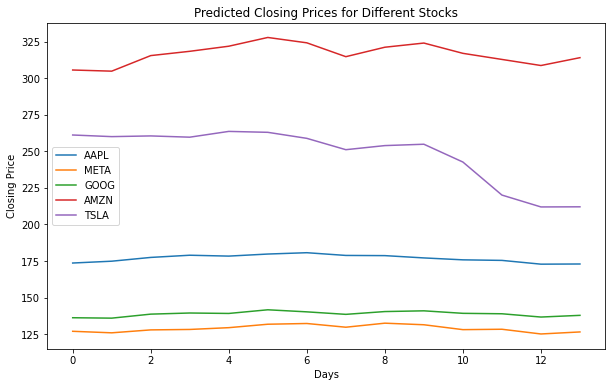

In [98]:
# Stocks
stocks = symbols

# Plotting
plt.figure(figsize=(10, 6))

for i, stock in enumerate(stocks):
    plt.plot(predicted_closing_prices[:, i], label=stock)

plt.title('Predicted Closing Prices for Different Stocks')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [99]:
model= LinearRegression(copy_X=True, fit_intercept=True, normalize= False)
model.fit(X_train, y_train)

pred = model.predict(X_test)

r2 = r2_score(y_test, pred)

print(r2)

0.9462212451721097
